#  Predict Graduate Admissions
Probelm Statement This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 ) is the Target Variable

Models

Logistic Regression
Random Forest
Support Vector Machine
This Model will help Beginners as well Intermediate ML Practitioners models will be introduced. Also measure the accuracy of models that are built by using Machine Learning, and further development will be assessed.



# 1. Load the Data and Analysis of Variables

In [2]:
import numpy as np
import pandas as pd

# Read the Data and check the Column Names to check the Space in the Names
df=pd.read_csv("Admission_Predict.csv")
col_names=df.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample Data:")
print(df.head())

Column names:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Sample Data:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


# Rename columns to make their use easier.

In [4]:
df=df.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

In [5]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

# Check shape of the data and whether there exist missing values:

In [6]:
print('Shape of the data:')
df.shape

Shape of the data:


(400, 9)

In [7]:
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


no          0
gre         0
toefl       0
rating      0
sop         0
lor         0
gpa         0
research    0
chance      0
dtype: int64

# Data Exploration

In [8]:
df.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
df.groupby('rating').mean()

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,233.807692,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,214.813084,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,204.165414,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,199.594595,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,153.533333,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


In [10]:
df[df['chance']>0.82].groupby('chance').mean()

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,251.000000,326.000000,112.666667,3.666667,3.833333,4.166667,9.120000,0.666667
0.84,207.111111,324.000000,109.444444,3.444444,3.777778,3.555556,9.038889,1.000000
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,195.750000,325.500000,114.750000,4.250000,4.312500,4.437500,9.107500,0.875000
0.87,155.800000,326.400000,111.400000,4.400000,4.400000,4.200000,9.072000,0.800000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,227.444444,329.111111,113.666667,4.444444,4.333333,4.166667,9.263333,0.888889
0.90,151.000000,331.000000,116.125000,4.000000,4.562500,4.062500,9.305000,1.000000
0.91,199.857143,331.714286,114.857143,4.428571,4.285714,4.428571,9.358571,1.000000


# Data Visualization
## Histogram of Admission Chance

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['chance'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

NameError: name 'df' is not defined

<Figure size 600x400 with 0 Axes>

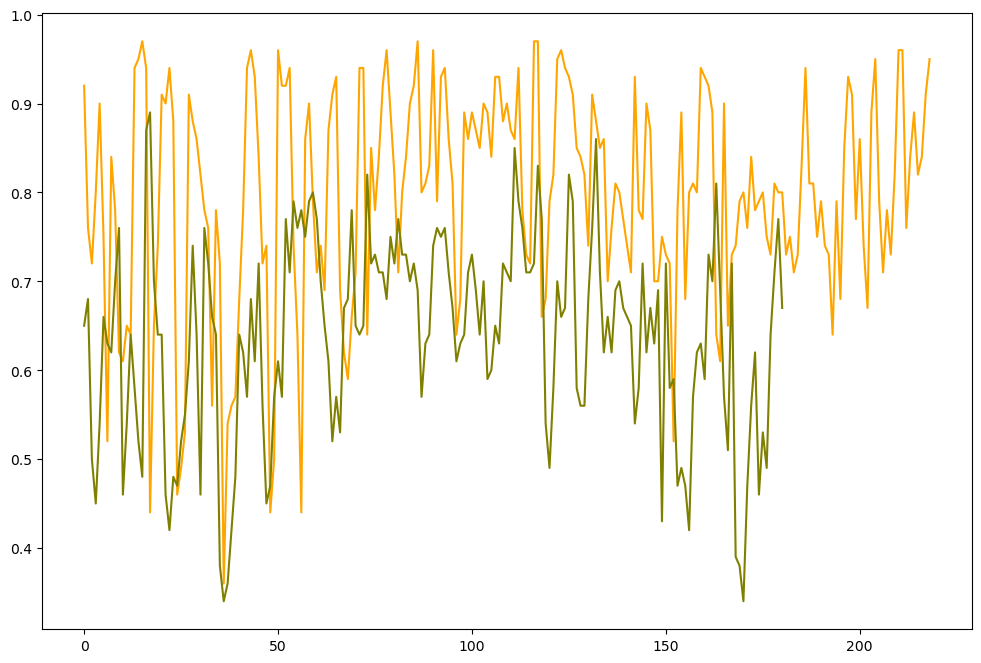

In [14]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df[df['research']==1])), df[df['research']==1]['chance'], color='orange')
plt.plot(range(len(df[df['research']==0])), df[df['research']==0]['chance'], color='olive')
plt.show()

# Scatter Plot of University Rating and The Chance of Admission

In [2]:
df.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

NameError: name 'df' is not defined

# Histogram of Numeric Variables

In [3]:
df.hist(bins=10, figsize=(20,15))
plt.show()

NameError: name 'df' is not defined

# Data Preperation

In [19]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [ ]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance']
x=[i for i in var if i not in ['chance']]
x=df[x]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [4]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

NameError: name 'x_train' is not defined

# Classification Models & Furher Analysis

In [ ]:
import numpy as np
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)


# Logistic Regression

In [ ]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)


# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(x_test)))

cy = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()

# Random Forest

In [5]:
# Fitting random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(cy_test, rf.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, rf.predict(x_test)))

cy = rf.predict(x_test)
rf_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

NameError: name 'x_train' is not defined

# Support Vector Machine

In [32]:
# Fitting support vector machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, cy_train)

# Printing accuracy score & confusion matrix
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(cy_test, svc.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, svc.predict(x_test)))

cy = svc.predict(x_test)
svc_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()

Support vector machine accuracy: 0.925
--------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        62
           1       0.93      0.72      0.81        18

    accuracy                           0.93        80
   macro avg       0.93      0.85      0.88        80
weighted avg       0.93      0.93      0.92        80



TypeError: confusion_matrix() takes 2 positional arguments but 3 were given

# Feature Importance for Random Forest Model

In [33]:
f_imp=pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
print(f_imp)


gpa         0.376845
gre         0.182198
toefl       0.149208
rating      0.131776
sop         0.075965
lor         0.070899
research    0.013109
dtype: float64
